In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# **Carga de datos**

In [ ]:
# Atención: modificar la ubicación del archivo en donde lo tengan en su propio drive
IA_datos = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Datos.xlsx", sheet_name='Base IA')
TA_datos = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Datos.xlsx", sheet_name='Base TA')

##Análisis exploratorio de datos

In [ ]:
TA_datos.shape

(2201, 14)

In [ ]:
IA_datos.shape

(2247, 14)

In [ ]:
IA_datos.head(5)

,Tipo,Estado,Fecha de apertura,Fecha aprertura numero,IA,Fecha Modificación,Fecha Resuelto,Criticidad,Sub estado,SLA petición,Fecha de caducidad,Tiempo resolución (días),SLA,Usuario AD
0,Incidente,CLOSED,2024-01-01T20:20:51.167Z,65221700.85,0.000000,2024-01-11T19:00:01.214Z,2024-01-04T17:10:41.408Z,Baja,NaN,48,2024-01-08T13:00:00Z,2.867943,Ok,EE9151
1,Incidente,CLOSED,2024-01-02T08:36:26.849Z,65222436.43,735.583333,2024-01-12T11:00:01.273Z,2024-01-05T09:37:58.174Z,Baja,NaN,48,2024-01-09T06:36:26.849Z,3.042724,Ok,AMA0829
2,Solicitud,CLOSED,2024-01-02T08:45:16.557Z,65222445.27,8.833333,2024-01-09T15:00:00.563Z,2024-01-02T13:24:28.271Z,Baja,NaN,48,2024-01-09T06:45:16.557Z,0.193886,Ok,AC1234
3,Solicitud,CLOSED,2024-01-02T08:58:53.171Z,65222458.88,13.616667,2024-03-11T09:42:32.097Z,2024-01-08T10:46:09.116Z,Baja,NaN,96,2024-01-15T14:58:53.171Z,6.074490,Ok,PA7894
4,Incidente,CLOSED,2024-01-02T10:02:27.654Z,65222522.45,63.566667,2024-07-23T15:43:56.906Z,2024-02-22T14:23:28.119Z,Baja,NaN,48,2024-01-09T08:02:27.654Z,51.181255,NO OK,AMA0787


In [ ]:
TA_datos.head(5)

,Tipo,Estado,Fecha de apertura,Fecha aprertura numero,Fecha Modificación,Fecha Resuelto,Fecha resulto Numero,TA,Criticidad,SLA petición,Fecha de caducidad,Tiempo resolución (días),SLA,Usuario AD
0,Solicitud,CLOSED,2024-01-02T10:24:55.898Z,65222544.92,2024-01-04T12:12:40.977Z,2024-01-02T10:51:01.156Z,65222571.02,26.100000,Baja,48,2024-01-09T08:24:55.898Z,0.018116,Ok,PA7894
1,Solicitud,CLOSED,2024-01-02T08:45:16.557Z,65222445.27,2024-01-09T15:00:00.563Z,2024-01-02T13:24:28.271Z,65222724.47,279.200000,Baja,48,2024-01-09T06:45:16.557Z,0.193886,Ok,AC1234
2,Solicitud,CLOSED,2024-01-02T12:26:57.91Z,65222666.95,2024-01-09T15:00:00.533Z,2024-01-02T13:42:35.727Z,65222742.58,18.116667,Baja,96,2024-01-16T08:26:57.91Z,0.052521,Ok,AC1234
3,Solicitud,CLOSED,2024-01-02T13:07:53.095Z,65222707.88,2024-01-09T17:00:01.011Z,2024-01-02T15:58:19.125Z,65222878.32,170.433333,Baja,48,2024-01-09T11:07:53.095Z,0.118357,Ok,IF8520
4,Incidente,CLOSED,2024-01-03T12:21:48.26Z,65224101.80,2024-01-10T15:00:01.366Z,2024-01-03T14:55:17.136Z,65224255.28,153.483333,Media,96,2024-01-17T08:21:48.26Z,0.106584,Ok,PA7894


### Tipos de datos


In [ ]:
IA_datos.dtypes

,0
Tipo,object
Estado,object
Fecha de apertura,object
Fecha aprertura numero,float64
IA,float64
Fecha Modificación,object
Fecha Resuelto,object
Criticidad,object
Sub estado,object
SLA petición,int64


In [ ]:
TA_datos.dtypes

,0
Tipo,object
Estado,object
Fecha de apertura,object
Fecha aprertura numero,float64
Fecha Modificación,object
Fecha Resuelto,object
Fecha resulto Numero,float64
TA,float64
Criticidad,object
SLA petición,int64


### Inspección de datos nulos

In [ ]:
TA_datos.isnull().sum()

,0
Tipo,0
Estado,0
Fecha de apertura,0
Fecha aprertura numero,0
Fecha Modificación,0
Fecha Resuelto,0
Fecha resulto Numero,0
TA,0
Criticidad,0
SLA petición,0


In [ ]:
IA_datos.isnull().sum()

,0
Tipo,0
Estado,0
Fecha de apertura,0
Fecha aprertura numero,0
IA,0
Fecha Modificación,0
Fecha Resuelto,46
Criticidad,0
Sub estado,2216
SLA petición,0


### Acceso a datos



In [ ]:
IA_datos['IA']

,IA
0,0.000000
1,735.583333
2,8.833333
3,13.616667
4,63.566667
...,...
2242,32.383333
2243,29.733333
2244,0.250000
2245,21.816667


In [ ]:
TA_datos['TA']

,TA
0,26.100000
1,279.200000
2,18.116667
3,170.433333
4,153.483333
...,...
2196,244.066667
2197,0.216667
2198,0.400000
2199,0.600000


##Visualización de Datos

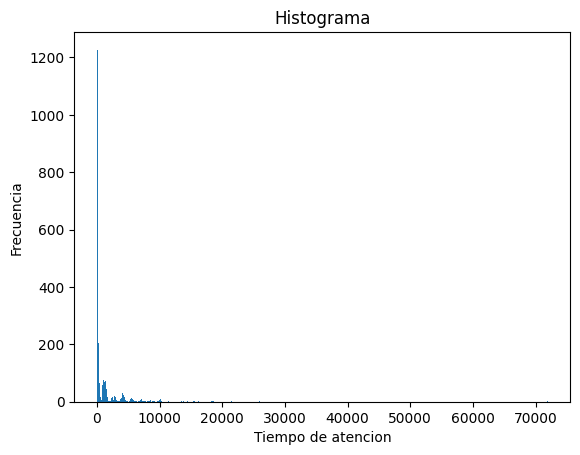

In [ ]:
# Histograma de Tiempo de atencion
plt.title("Histograma")
plt.xlabel("Tiempo de atencion")
plt.ylabel("Frecuencia")
plt.hist(TA_datos['TA'], bins=500)
plt.show()

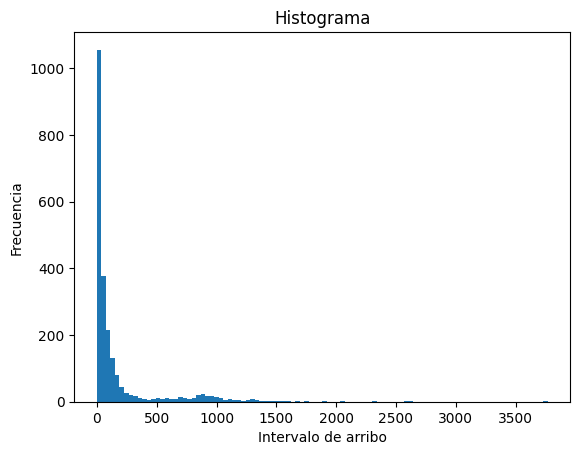

In [ ]:
# Histograma de Intervalo de arribo
plt.title("Histograma")
plt.xlabel("Intervalo de arribo")
plt.ylabel("Frecuencia")
plt.hist(IA_datos['IA'], bins=100)
plt.show()

## Ajuste de Datos

In [ ]:
pip install fitter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 77.1 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [ ]:
#Importamos fitter
from fitter import Fitter

In [ ]:
f1 = Fitter(TA_datos['TA'])

In [ ]:
f2 = Fitter(IA_datos['IA'])

In [ ]:
f1.fit()

In [ ]:
f2.fit()

In [ ]:
f1.summary(5)

In [ ]:
f2.summary(5)

In [ ]:
# Obtengo los parámetros de la mejor fdp
f1.get_best(method='sumsquare_error')

In [ ]:
f2.get_best(method='sumsquare_error')

## Verificación

In [ ]:
loc1 = -91.13816963997854
scale1 = 350.7249689146642
h2 = 0.7882610005908149
k2 = -1.1313667389574324
loc2 = 7.047753953250408
scale2 = 34.21147541897436
kappa2 = 0.063135211043779

In [ ]:
f1_verif = stats.gibrat.rvs(loc1, scale1, size=4000, random_state=None)

In [ ]:
f2_verif = stats.kappa4.rvs(h2,k2,loc2,scale2, size=4000, random_state=None)

In [ ]:
type(f1_verif)

In [ ]:
type(f2_verif)

In [ ]:
f1_verif

In [ ]:
f2_verif

In [ ]:
# Histograma de datos de verificación
plt.title("Histograma")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.xlim(0, 80000)
plt.ylim(0, 1200)
plt.hist(f1_verif, bins=100)
plt.show()

In [ ]:
# Histograma de datos de verificación
plt.title("Histograma")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.xlim(0, 4000)
plt.ylim(0, 1000)
plt.hist(f2_verif, bins=100)
plt.show()

NameError: name 'plt' is not defined